In [1]:
from aemulusnu_massfunction.emulator_training import *
from aemulusnu_massfunction.fisher_utils import *

loading emulator from /home/users/delon/aemulusnu_massfunction/aemulusnu_massfunction/emulator.pkl


In [2]:
fiducial_cosmology = {'10^9 As':2.1,
                      'ns': 0.9649,
                      'H0': 67.36,
                      'w0': -1,
                      'ombh2': 0.02237,
                      'omch2': 0.12,
                      'nu_mass_ev': 0.06,}
fiducial_cosmo_vals = get_cosmo_vals(fiducial_cosmology)
fiducial_ccl_cosmo = get_ccl_cosmology(tuple(fiducial_cosmo_vals))


In [3]:
fiducial_log10_rel_step_size

{'10^9 As': -2.6,
 'ns': -4,
 'H0': -2.3,
 'w0': -2.3,
 'ombh2': -2.6,
 'omch2': -2.3,
 'nu_mass_ev': -2.3}

In [4]:
fiducial_log10_rel_step_size.keys()

dict_keys(['10^9 As', 'ns', 'H0', 'w0', 'ombh2', 'omch2', 'nu_mass_ev'])

In [5]:
plt.show()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

plt.rcParams['font.size'] = 11
# import seaborn as sns

In [6]:
import matplotlib as mpl
import matplotlib.colors as mcolors


In [7]:
import os.path
import datetime
import pickle
import numpy as np
a_list_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/alist.pkl'
a_list_f = open(a_list_fname, 'rb')
a_list = pickle.load(a_list_f) 
a_list_f.close()
print('alist', a_list)

weird_boxes = []
errors = {a:{} for a in a_list}
shots = {a:{} for a in a_list}
for box in ['Box_n50_0_1400']:
    if(box in weird_boxes):
        continue
    if('n50' not in box):
        continue
    jackknife_covs_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/'+box+'_jackknife_covs.pkl'
    jackknife_covs_f = open(jackknife_covs_fname, 'rb')
    jackknife = pickle.load(jackknife_covs_f)
    jackknife_covs_f.close()

    for a in a_list:
        plot_data = None
        file_path = "/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/%s_%.2f_NvMfit_output.pkl" % (box, a)

        with open(file_path, "rb") as f:
            plot_data = pickle.load(f)

        model = plot_data['tinker_eval']
        true  = plot_data['N']
        edges = plot_data['edges']
        edgeslog10 = np.log10(edges)
        
        jack_error = jackknife[a][1]
        assert(jack_error.shape[0] == model.shape[0])
        assert(len(true) == len(model))
        assert(len(true) == len(edges)-1)
        for ledge, redge, model_in_bin, true_in_bin, jk_err in zip(edgeslog10, edgeslog10[1:], model, true, np.diag(jack_error)):
            ledge = np.round(ledge, decimals=1)
            redge = np.round(redge, decimals=1)
            if((ledge, redge) not in errors[a]):
                errors[a][(ledge, redge)] = []
                shots[a][(ledge, redge)] = [] 
            errors[a][(ledge, redge)] += [np.abs(model_in_bin-true_in_bin)/true_in_bin]
#             shots[a][(ledge, redge)] += [np.sqrt(true_in_bin)/true_in_bin]
            shots[a][(ledge, redge)] += [np.sqrt(jk_err) / true_in_bin]


alist [1.0, 0.953321, 0.866399, 0.787402, 0.715608, 0.65036, 0.620002, 0.591061, 0.563471, 0.537169, 0.512095, 0.488191, 0.403224, 0.366459, 0.302679]


In [8]:
for a in errors:
    for pair in errors[a]:
        if(errors[a][pair][0]>0.01):
            print('z= %.2f'%(1/(a)-1), pair)
            print('\t %.4f'%(errors[a][pair][0]))
    print()

z= 0.00 (13.0, 13.1)
	 0.0106
z= 0.00 (14.1, 14.2)
	 0.0220
z= 0.00 (14.2, 14.3)
	 0.0180
z= 0.00 (14.3, 14.4)
	 0.0182
z= 0.00 (14.4, 14.5)
	 0.0156
z= 0.00 (14.5, 14.6)
	 0.0176
z= 0.00 (14.6, 14.7)
	 0.0436
z= 0.00 (14.8, 14.9)
	 0.0455
z= 0.00 (14.9, 15.0)
	 0.0573
z= 0.00 (15.0, 15.1)
	 0.0575
z= 0.00 (15.1, 15.2)
	 0.0472
z= 0.00 (15.2, 15.3)
	 0.2678
z= 0.00 (15.3, 15.8)
	 0.2870

z= 0.05 (13.9, 14.0)
	 0.0188
z= 0.05 (14.1, 14.2)
	 0.0303
z= 0.05 (14.4, 14.5)
	 0.0173
z= 0.05 (14.6, 14.7)
	 0.0361
z= 0.05 (14.7, 14.8)
	 0.0229
z= 0.05 (14.8, 14.9)
	 0.0116
z= 0.05 (14.9, 15.0)
	 0.1078
z= 0.05 (15.1, 15.2)
	 0.0392
z= 0.05 (15.2, 15.7)
	 0.2484

z= 0.15 (13.8, 13.9)
	 0.0100
z= 0.15 (13.9, 14.0)
	 0.0110
z= 0.15 (14.0, 14.1)
	 0.0194
z= 0.15 (14.1, 14.2)
	 0.0414
z= 0.15 (14.5, 14.6)
	 0.0406
z= 0.15 (14.6, 14.7)
	 0.0378
z= 0.15 (14.7, 14.8)
	 0.0577
z= 0.15 (14.8, 14.9)
	 0.0172
z= 0.15 (14.9, 15.0)
	 0.0793
z= 0.15 (15.0, 15.1)
	 0.0314
z= 0.15 (15.1, 15.2)
	 0.1961
z= 0.15 

In [9]:
for a in errors:
    for pair in errors[a]:
        print(pair)
    print()

(12.9, 13.0)
(13.0, 13.1)
(13.1, 13.2)
(13.2, 13.3)
(13.3, 13.4)
(13.4, 13.5)
(13.5, 13.6)
(13.6, 13.7)
(13.7, 13.8)
(13.8, 13.9)
(13.9, 14.0)
(14.0, 14.1)
(14.1, 14.2)
(14.2, 14.3)
(14.3, 14.4)
(14.4, 14.5)
(14.5, 14.6)
(14.6, 14.7)
(14.7, 14.8)
(14.8, 14.9)
(14.9, 15.0)
(15.0, 15.1)
(15.1, 15.2)
(15.2, 15.3)
(15.3, 15.8)

(12.9, 13.0)
(13.0, 13.1)
(13.1, 13.2)
(13.2, 13.3)
(13.3, 13.4)
(13.4, 13.5)
(13.5, 13.6)
(13.6, 13.7)
(13.7, 13.8)
(13.8, 13.9)
(13.9, 14.0)
(14.0, 14.1)
(14.1, 14.2)
(14.2, 14.3)
(14.3, 14.4)
(14.4, 14.5)
(14.5, 14.6)
(14.6, 14.7)
(14.7, 14.8)
(14.8, 14.9)
(14.9, 15.0)
(15.0, 15.1)
(15.1, 15.2)
(15.2, 15.7)

(12.9, 13.0)
(13.0, 13.1)
(13.1, 13.2)
(13.2, 13.3)
(13.3, 13.4)
(13.4, 13.5)
(13.5, 13.6)
(13.6, 13.7)
(13.7, 13.8)
(13.8, 13.9)
(13.9, 14.0)
(14.0, 14.1)
(14.1, 14.2)
(14.2, 14.3)
(14.3, 14.4)
(14.4, 14.5)
(14.5, 14.6)
(14.6, 14.7)
(14.7, 14.8)
(14.8, 14.9)
(14.9, 15.0)
(15.0, 15.1)
(15.1, 15.2)
(15.2, 15.7)

(12.9, 13.0)
(13.0, 13.1)
(13.1, 13.2)
(13.2, 13

In [10]:
labels = {
    '10^9 As': r'10^9A_s',
    'ns': r'n_s',
    'H0': r'H_0',
    'w0': r'w_0',
    'ombh2': r'\Omega_b h^2',
    'omch2': r'\Omega_c h^2',
    'nu_mass_ev': r'\sum m_\nu',
}

In [11]:
from labellines import labelLine, labelLines

In [12]:
fiducial_log10_rel_step_size

{'10^9 As': -2.6,
 'ns': -4,
 'H0': -2.3,
 'w0': -2.3,
 'ombh2': -2.6,
 'omch2': -2.3,
 'nu_mass_ev': -2.3}

In [13]:
zs = np.linspace(0,2,5)
print(zs)

[0.  0.5 1.  1.5 2. ]


[0.  0.4 0.8 1.2 1.6 2. ]


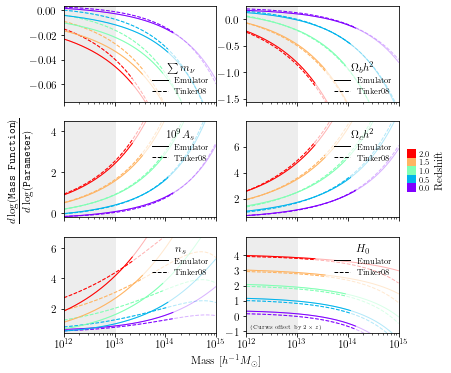

In [14]:
rainbow = mpl.colormaps['rainbow'].resampled(len(zs))
rainbow_list = [mcolors.rgb2hex(rainbow(i)) for i in range(rainbow.N)]

varied_param = 'nu_mass_ev'


fig, meta_axs = plt.subplots(3,2, figsize=(6,6), sharex=True)


MMAX = dict(zip(zs, [14.15, 14.05, 13.95, 13.55, 13.35,]))


for ax in meta_axs.flatten():
    ax.fill_between([1e12, 1e13], [-1000, -1000],[1000,1000], color='0.93')

for varied_param,axs,CLOC in zip(['nu_mass_ev', 'ombh2'  , '10^9 As', 'omch2', 'ns', 'H0', ], 
                                 meta_axs.flatten(),
                                ['lower right', 'lower right', 'upper right', 'upper right', 'upper right', 'upper right']):
    step = np.abs(fiducial_cosmology[varied_param]) * 10**(fiducial_log10_rel_step_size[varied_param])


    cosmology_plus = fiducial_cosmology.copy()
    cosmology_plus[varied_param] +=  step
    cosmo_plus = get_ccl_cosmology(tuple(get_cosmo_vals(cosmology_plus)))

    cosmology_minus = fiducial_cosmology.copy()
    cosmology_minus[varied_param] -=  step
    cosmo_minus = get_ccl_cosmology(tuple(get_cosmo_vals(cosmology_minus)))

    h = fiducial_cosmology['H0']/100
    bounds_that_matter_y = [np.inf,-np.inf]
    for i, (mf,lbl) in enumerate(zip([tinker08_hmf, emulator ], 
                           [ 'tinker', 'aemulus',])):

        for j,z_curr in enumerate(zs):
            M = 10**np.linspace(12, MMAX[z_curr], 150)

            dndm_plus = mf(cosmo_plus, M/h, redshiftToScale(z_curr))
            dndm_minus = mf(cosmo_minus, M/h, redshiftToScale(z_curr))
            dndm_dAs = (dndm_plus- dndm_minus)/(2*step)
            dndm_fid = mf(fiducial_ccl_cosmo,  M/h, redshiftToScale(z_curr))
            sty = '-'
            if(i==0):
#                 print(mf.name)
                sty = '--'
            tmp = 0
            if(varied_param == 'H0'):
                tmp = 2*z_curr
            
            plotted_data = fiducial_cosmology[varied_param]*dndm_dAs/dndm_fid+ tmp
            axs.plot(M, plotted_data, 
                     sty, color=rainbow_list[j], lw=1)
            
            
            YLO, YHI = plotted_data.min() , plotted_data.max()
            if(YLO < bounds_that_matter_y[0]):
                bounds_that_matter_y[0] = YLO
            if(YHI > bounds_that_matter_y[1]):
                bounds_that_matter_y[1] = YHI
                
            M = 10**np.linspace(12, 15, 150)

            dndm_plus = mf(cosmo_plus, M/h, redshiftToScale(z_curr))
            dndm_minus = mf(cosmo_minus, M/h, redshiftToScale(z_curr))
            dndm_dAs = (dndm_plus- dndm_minus)/(2*step)
            dndm_fid = mf(fiducial_ccl_cosmo,  M/h, redshiftToScale(z_curr))
            sty = '-'
            if(i==0):
#                 print(mf.name)
                sty = '--'
            tmp = 0
            if(varied_param == 'H0'):
                tmp = 2*z_curr
                
            axs.plot(M, fiducial_cosmology[varied_param]*dndm_dAs/dndm_fid+ tmp, 
                     sty, color=rainbow_list[j], lw=1, alpha=0.3)
    if(bounds_that_matter_y[0]<0):
        bounds_that_matter_y[0]*=1/0.8
    else:
        bounds_that_matter_y[0]*=0.8
    
    if(bounds_that_matter_y[1]<0):
        bounds_that_matter_y[1]*=0.8
    else:
        bounds_that_matter_y[1]*=1/0.8
    axs.set_ylim(bounds_that_matter_y[0], bounds_that_matter_y[1])
#     labelLines(axs.get_lines(), zorder=2, fontsize=8)

#     print(labels[varied_param])
    tmp0, tmp1 = (axs.get_ylim())

    axs.plot([-1,0], [-1,0], 'k-', lw=1, label='Emulator')
    axs.plot([-1,0], [-1,0], 'k--', lw=1, label='Tinker08')

    axs.legend(title = r'$%s$'%labels[varied_param], 
               frameon=False, fontsize=8,
              loc=CLOC);
#     axs.set_ylim(tmp0, tmp1)

    if(varied_param == 'H0'):
        axs.text(.025, .025, s=r'(Curves offset by $2\times z$)',
            transform=axs.transAxes,
            horizontalalignment='left',
            verticalalignment='bottom',
            c='black',
            fontsize=5)
        axs.set_yticks([-3,-2,-1,0,1,2,3,4])
        axs.set_ylim(tmp0, tmp1+.05*tmp1)

    axs.set_xscale('log')
    axs.set_xlim(1e12, 1e15)
    
    
#         axs.set_ylim(-.15, .15)
    
    
fig.text(0.05, 0.5, r'$$\frac{d\log(\texttt{Mass Function})}{d\log(\texttt{Parameter})}$$'+'\n\n', 
         ha='center', 
         va='center', 
         rotation='vertical',
        fontsize=11)

    
    
fig.text(0.5, 0.075, r'Mass $[h^{-1}M_\odot]$',
         ha='center', 
         va='top', 
        fontsize=11)


fig.colorbar_ax = fig.add_axes([0.92, 0.45, 0.02, 0.1])  # Adjust the position and size as needed

# Create a colormap from the list of colors
cmap = mpl.colors.ListedColormap(rainbow_list)

# Create a boundary norm with boundaries in the middle of the z values
boundaries = np.linspace(zs.min(), zs.max(), len(zs)+1)
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N, clip=True)
print(boundaries)
# Create a colorbar with the custom cmap and norm
cb = mpl.colorbar.ColorbarBase(fig.colorbar_ax, 
                               cmap=cmap, 
                               norm=norm, 
#                                boundaries=boundaries[:-1], 
                               ticks=[0.2, 0.6,1,1.4,1.8])

# Set the tick labels to the corresponding z values

cb.set_ticklabels([f'{z:.1f}' for z in zs])

cb.outline.set_visible(False)

cb.set_label('Redshift')

cb.ax.tick_params(labelsize=8)
cb.ax.tick_params(size=0)
cb.ax.yaxis.set_tick_params(size=0)  # Hide the ticks
fig.colorbar_ax.tick_params(size=0)
fig.colorbar_ax.tick_params(which='both', size=0)

# Make sure the colorbar is only as tall as the subplots
fig.subplots_adjust(right=0.9)  # Adjust the right parameter to make room for the colorbar


plt.savefig('log_deriv.pdf',bbox_inches='tight')